In [20]:
import sys
sys.path.append("../Decision Tree")
# from TreeNode import TreeNode
from DecisionTree import ID3
import pandas as pd
from utils import predict, calculate_error_rate, preprocess_numerical_columns

class BaggedTrees:
    def __init__(self, n_trees):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, data, attributes):
        for _ in range(self.n_trees):
            # 1. Sample with replacement from data
            bootstrap_sample = data.sample(n=len(data), replace=True)
            
            # 2. Train a decision tree on this sample
            tree = ID3(bootstrap_sample, attributes, float('inf'))
            self.trees.append(tree)

    def predict_tree(self, tree, instance):
        node = tree
        while node.children: 
            attribute_name = node.attributes 
            attribute_value = instance[attribute_name]
            matched_child = None
            for child in node.children:
                if child.attributes == attribute_value:  
                    matched_child = child  
                    break
            if matched_child:
                node = matched_child
                for subnode in node.children:
                    node = subnode
            else:
                break
        return node.label

    def predict(self, dataset):
        all_predictions = []

        # For each instance in the dataset
        for _, instance in dataset.iterrows():
            # Predict with each tree and vote
            predictions = [self.predict_tree(tree, instance) for tree in self.trees]
            # Append the majority vote to all_predictions
            all_predictions.append(max(set(predictions), key=predictions.count))

        return all_predictions


In [21]:
# bank

# Test for real data set
def preprocess_data(df):
    # Convert continuous attributes to binary
    for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
        median = df[column].median()
        df[column] = df[column].apply(lambda x: 1 if x > median else 0)
    
    # Note: For columns with "unknown", we'll leave them as is. Pandas will treat them as a separate category.
    
    return df

# Load the training and test data
test_file_path = "Data/bank-4/test.csv"
train_file_path = "Data/bank-4/train.csv"
column_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_bank_train = pd.read_csv(train_file_path, names=column_names)
df_bank_test = pd.read_csv(test_file_path, names=column_names)
bank_attributes = df_bank_train.columns.tolist()[:-1]

# Apply preprocessing to train and test datasets
train_data = preprocess_data(df_bank_train)
test_data = preprocess_data(df_bank_test)
attributes = bank_attributes


In [22]:
import matplotlib.pyplot as plt

training_errors = []
testing_errors = []

for n in range(1, 11):  # Looping n from 1 to 500
    bagged_model = BaggedTrees(n_trees=n)
    bagged_model.fit(train_data, attributes)

    # Training error
    predictions = bagged_model.predict(train_data)
    true_labels_train = train_data.iloc[:, -1].tolist()
    error_rate_train = calculate_error_rate(predictions, true_labels_train)
    training_errors.append(error_rate_train)

    # Testing error
    predictions = bagged_model.predict(test_data)
    true_labels_test = test_data.iloc[:, -1].tolist()
    error_rate_test = calculate_error_rate(predictions, true_labels_test)
    testing_errors.append(error_rate_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_errors, label='Training Error', marker='o')
plt.plot(range(1, 11), testing_errors, label='Testing Error', marker='x')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
file_path = "Data/credit-card/credit_card.xls"
df = pd.read_excel(file_path, header=1)

# Deal with numeric value
for column in df.columns:
    if df[column].dtype == 'int64':
        median_value = df[column].median()
        df[column] = (df[column] >= median_value).astype(int)

train_data, test_data = train_test_split(df, train_size=24000, test_size=6000, random_state=42)
attributes =  train_data.columns.tolist()[:-1]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
train_data.head()

Training data shape: (24000, 25)
Testing data shape: (6000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21753,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,1
251,0,0,0,1,1,0,1,1,1,1,...,1,1,0,1,0,0,0,0,0,1
22941,1,1,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,1,0,1
618,0,0,0,0,1,0,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
17090,1,0,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


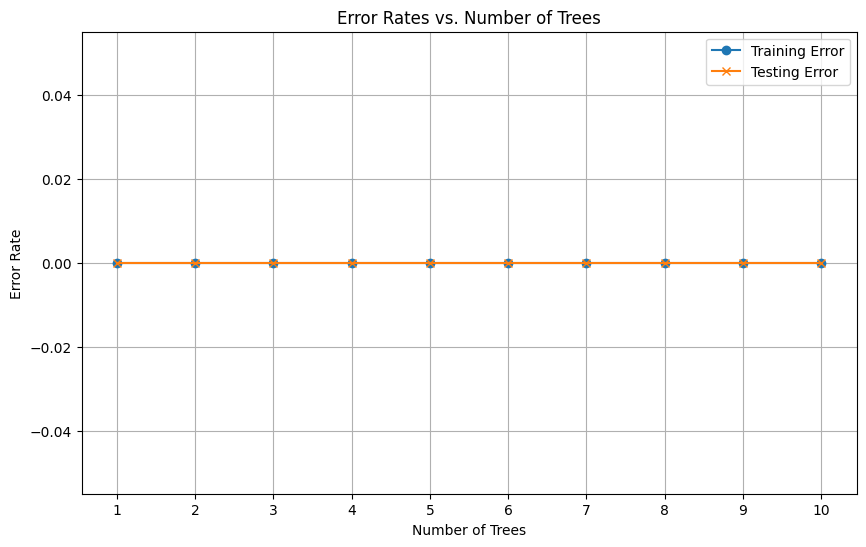

In [19]:
import matplotlib.pyplot as plt

training_errors = []
testing_errors = []

for n in range(1, 11):  # Looping n from 1 to 500
    bagged_model = BaggedTrees(n_trees=n)
    bagged_model.fit(train_data, attributes)

    # Training error
    predictions = bagged_model.predict(train_data)
    true_labels_train = train_data.iloc[:, -1].tolist()
    error_rate_train = calculate_error_rate(predictions, true_labels_train)
    training_errors.append(error_rate_train)

    # Testing error
    predictions = bagged_model.predict(test_data)
    true_labels_test = test_data.iloc[:, -1].tolist()
    error_rate_test = calculate_error_rate(predictions, true_labels_test)
    testing_errors.append(error_rate_test)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_errors, label='Training Error', marker='o')
plt.plot(range(1, 11), testing_errors, label='Testing Error', marker='x')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()